In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer as timer

In [27]:
# (start, end]
def minimum_index(arr, start, end):
    min_index = start
    
    for i in range(start, end):
        if arr[i] < arr[min_index]:
            min_index = i
    
    return min_index

def selection_sort(arr):
    for i in range(len(arr) - 1):
        min_index = minimum_index(arr, i, len(arr))
        # We could check if the indexes are equal to know if we should swap, but thats just trading swap for comparison
        arr[i], arr[min_index] = arr[min_index], arr[i]
    
    return arr

In [28]:
# trivial sorts
print(selection_sort([]))
print(selection_sort([123]))

# ordered
print(selection_sort([1, 2, 3]))
# reverse ordered
print(selection_sort([3, 2, 1]))

# other permutations
print(selection_sort([1, 3, 2]))
print(selection_sort([2, 1, 3]))
print(selection_sort([2, 3, 1]))
print(selection_sort([3, 1, 2]))

[]
[123]
[1, 2, 3]
[1, 2, 3]
[1, 2, 3]
[1, 2, 3]
[1, 2, 3]
[1, 2, 3]


In [29]:
df = pd.DataFrame(columns=("array_size", "time"));

# be careful with size, because time complexity is quadratic
sizes = np.arange(1, 1000)
number_of_trials = 10

for array_size in sizes:
    arr = np.arange(array_size)
    rng = np.random.default_rng()
    rng.shuffle(arr)
    
    for i in range(number_of_trials):
        start = timer()
        sorted_arr = selection_sort(arr)
        end = timer()
        delta = end - start
        
        new_row = {
            "array_size": array_size,
            "time": delta
        }
        
        df.loc[len(df)] = new_row

df

,array_size,time
0,1,0.000008
1,1,0.000006
2,1,0.000003
3,1,0.000003
4,1,0.000004
...,...,...
9985,999,0.131322
9986,999,0.135655
9987,999,0.141280
9988,999,0.142004


<AxesSubplot:xlabel='array_size', ylabel='time'>

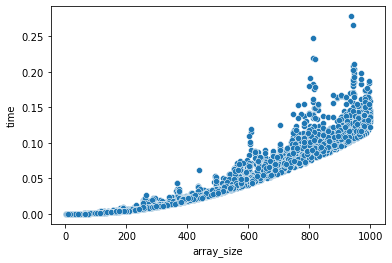

In [30]:
df_sample = df.sample(5000)
sns.scatterplot(data=df_sample, x="array_size", y="time")

O(n^2)

In [31]:
df_mean_times = df.groupby('array_size', as_index=False).agg(mean_time=pd.NamedAgg(column="time", aggfunc="mean"))
df_mean_times

,array_size,mean_time
0,1,0.000004
1,2,0.000008
2,3,0.000010
3,4,0.000011
4,5,0.000012
...,...,...
994,995,0.139634
995,996,0.135719
996,997,0.136137
997,998,0.139412


<AxesSubplot:xlabel='array_size', ylabel='mean_time'>

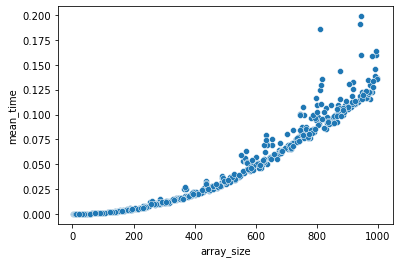

In [32]:
sns.scatterplot(data=df_mean_times.sample(500), x="array_size", y="mean_time")

Also O(n^2), about two times faster than bubble sort

Now i will try to estimate time with linear regression

In [33]:
df_regression = pd.DataFrame({
    'array_size': df['array_size'],
    'array_size^2': df['array_size']**2,
    'time': df['time']
})
df_regression

,array_size,array_size^2,time
0,1,1,0.000008
1,1,1,0.000006
2,1,1,0.000003
3,1,1,0.000003
4,1,1,0.000004
...,...,...,...
9985,999,998001,0.131322
9986,999,998001,0.135655
9987,999,998001,0.141280
9988,999,998001,0.142004


In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = df_regression[['array_size', 'array_size^2']]
y = df_regression['time']

model.fit(X, y)

LinearRegression()

In [35]:
model.coef_

array([2.75844027e-06, 1.38826583e-07])

In [36]:
regression_array_size = np.arange(1, 1000)
df_regression_predicted = pd.DataFrame({
    'array_size': regression_array_size,
    'array_size^2': regression_array_size**2
})

df_regression_predicted['time'] = model.predict(df_regression_predicted)

<AxesSubplot:xlabel='array_size', ylabel='time'>

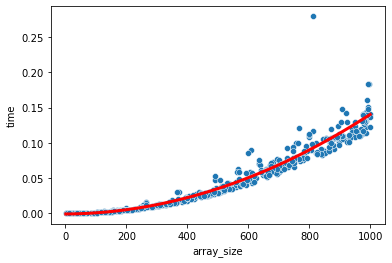

In [37]:
fig, ax = plt.subplots()

sns.scatterplot(ax=ax, data=df.sample(500), x="array_size", y="time")
sns.lineplot(ax=ax, data=df_regression_predicted, x="array_size", y="time", color="red", linewidth = 3)

For selection sort number of comparison grows as O(n^2), but number of swaps is O(n). That's why it is faster than bubble sor